# Übung 9 - Logistische Regression

## Multiple Logistische Regression

In [ ]:
# Daten einlesen - wir arbeiten nochmals mit dem Standard-Datensatz Iris von Scikit-Learn
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

X = iris.data.values # dieses Mal werden alle Features genommen!
y = iris.target_names[iris.target] =='virginica'

# Daten in Trainings- und Testdaten aufsplitten
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Modell trainieren
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

Accuracy: 1.0
Confusion Matrix:
 [[32  0]
 [ 0 13]]


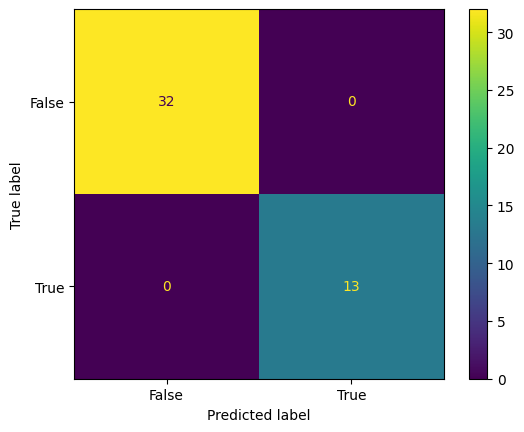

Precision: 1.0
Recall: 1.0
F1-Score: 1.0


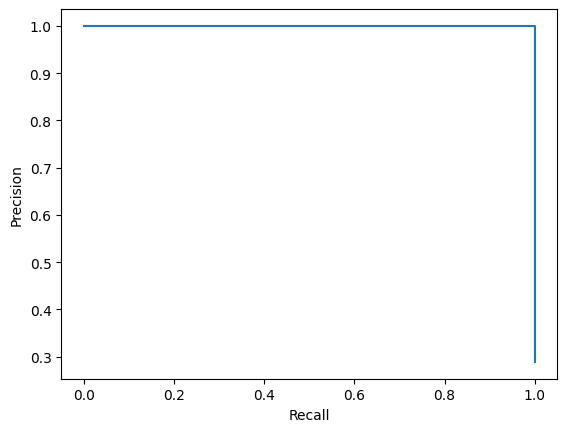

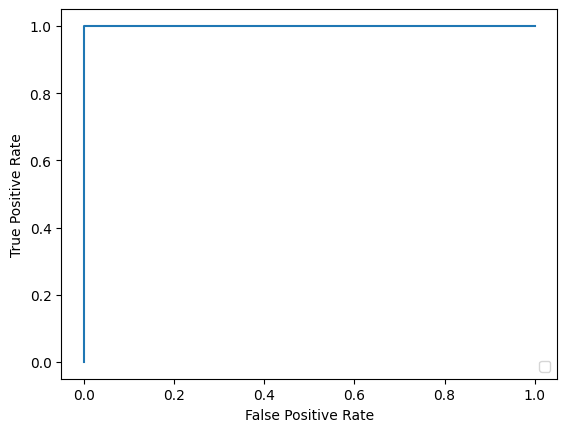

AUC: 1.0


In [ ]:
# Modell evaluieren

## Accuracy berechnen
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

## Confusion Matrix berechnen
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', confusion)
## Confusion Matrix visualisieren
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

## Precision und Recall berechnen
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision:', precision)
print('Recall:', recall)

## F1-Score berechnen
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print('F1-Score:', f1)

## Precision-Recall-Curve visualisieren
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

## ROC-Curve visualisieren
from sklearn.metrics import roc_curve, RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
disp.plot()
plt.show()

## AUC berechnen
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print('AUC:', auc)

## Multinomiale logistische Regression

In [ ]:
# Daten einlesen - wir arbeiten nochmals mit dem Standard-Datensatz Iris von Scikit-Learn
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

X = iris.data[["petal length (cm)", "petal width (cm)"]].values # dieses Mal werden zwei Features genommen!
y = iris.target # dieses Mal werden auch alle Klassen genommen!

# Zur Erinnerung die Zuweisung von iris.target zu iris.target_name
zuweisung = zip(iris.target.unique(), iris.target_names)
print(list(zuweisung))

# Daten in Trainings- und Testdaten aufsplitten
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

[(0, 'setosa'), (1, 'versicolor'), (2, 'virginica')]


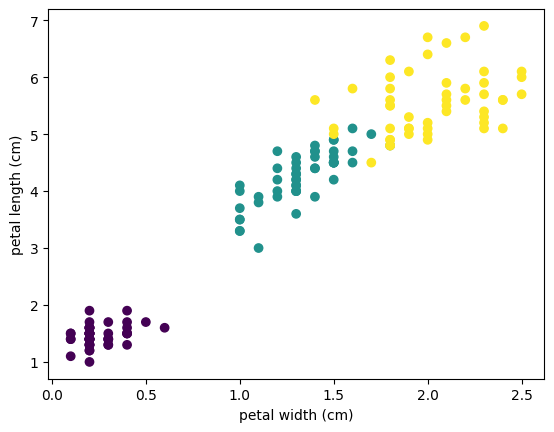

In [ ]:
# Daten von petal width (cm) vs petal length (cm) plotten und anhand iris.target einfärben
import matplotlib.pyplot as plt

plt.scatter(iris.data['petal width (cm)'], iris.data['petal length (cm)'], c=iris.target)
plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')
plt.show()

In [ ]:
# Modell trainieren
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
### skicitplot installieren -- nur bei erster Ausführung!
!pip install --upgrade scikit-plots

Accuracy: 0.9777777777777777
Confusion Matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0 16]]


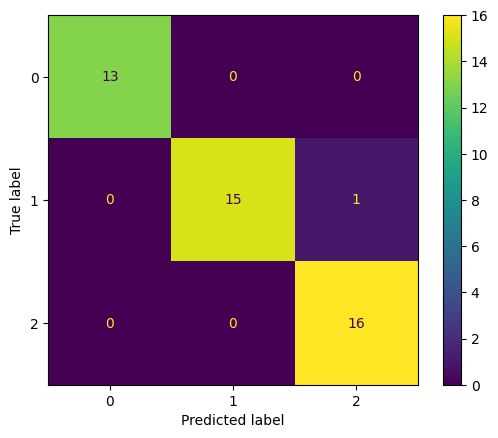

Precision: 0.9777777777777777
Recall: 0.9777777777777777
F1-Score: 0.9777777777777777


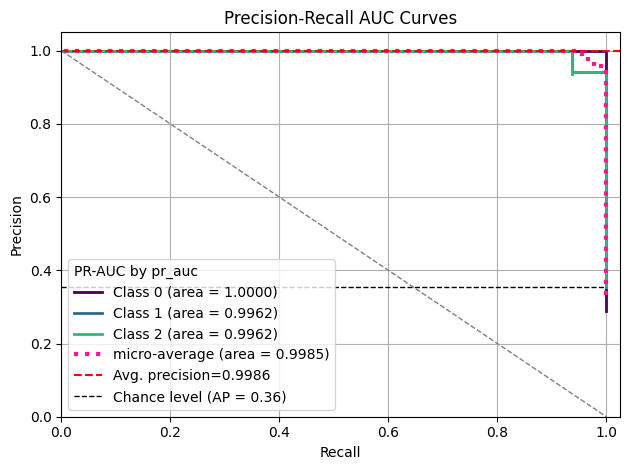

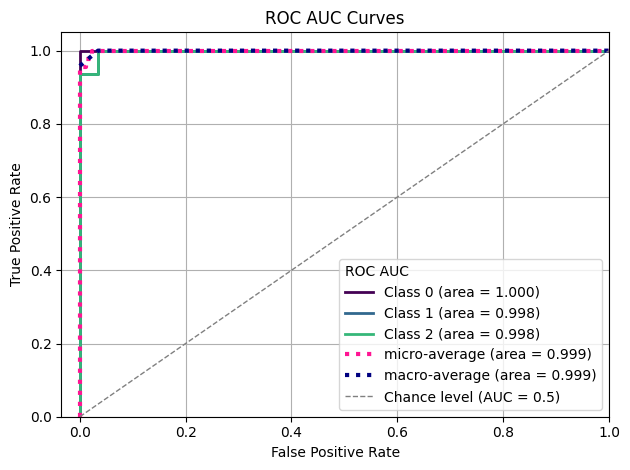

AUC: 0.9985632183908045


In [ ]:
# Modell evaluieren

## Accuracy berechnen
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

## Confusion Matrix berechnen
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', confusion)
## Confusion Matrix visualisieren
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

## Precision und Recall berechnen -> beachten Sie, dass definiert werden muss wie die Precision & Recall aggregiert / gemittelt werden
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
print('Precision:', precision)
print('Recall:', recall)

## F1-Score berechnen -> analog muss auch der f1-score aggregiert / gemittelt werden
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='micro')
print('F1-Score:', f1)

## Precision-Recall-Curve visualisieren
import scikitplot as skplt
skplt.metrics.plot_precision_recall(y_test, y_scores)
plt.show()

## ROC-Curve visualisieren
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, y_scores)
plt.show()

## AUC berechnen
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_scores, multi_class='ovr', average='macro')
print('AUC:', auc)

## Nun sind Sie dran